In [1]:
import os
import numpy as np
import pandas as pd
from keras.utils import load_img
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.image_utils import img_to_array
from keras.models import load_model

from PIL import Image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# path = '/content/drive/My Drive/backup_20_2_2023/HK2_2023/NienLuan/sources/'

from google.colab import drive
drive.mount('/content/drive')

# path = '/content/drive/My Drive/nien_luan/sources/'
path = '/content/drive/My Drive/backup_20_2_2023/HK2_2023/NienLuan/sources/'
data_path = path + "origin_data"
model_path = path + "models"

Mounted at /content/drive


In [3]:
# data_path = path + "origin_data"
# 0:20 1:30 2:50 3:60 4:70
label_name = ["Giới hạn tốc độ 40km/h", "Giới hạn tốc độ 50km/h", "Giới hạn tốc độ 60km/h",
          "Hết hạn giới hạn tốc độ tối đa 40km/h", "Hết hạn giới hạn tốc độ tối đa 50km/h",
          "Hết hạn giới hạn tốc độ tối đa", "Vào khu vực khu dân cư", "Ra khỏi khu vực khu dân cư", "Cấm", "Stop",
          "Chợ"
]

In [4]:
classes = len(label_name)
data = []
labels = []
for i in range(classes):
    path = os.path.join(data_path,str(i))
    images = os.listdir(path)
    for a in images:
        try:
            img = load_img( 
                        os.path.join(data_path,str(i),a),
                        grayscale=False,
                        color_mode="rgb",
                        target_size=(150,150),
            )
            img = np.array(img)
            data.append(img)
            labels.append(i)
        except:
            print('khong the load file')
print(pd.value_counts(labels))
X = np.array(data)
y = np.array(labels)
# X,y = load_and_resize_image(4, data_path, (150,150), False)

1     2418
2     1668
8     1168
9      827
0      549
5      301
4      204
3      166
7      158
6      148
10     111
dtype: int64


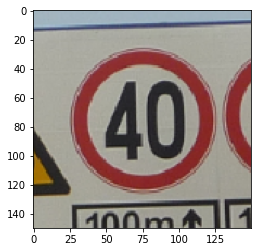

In [5]:
plt.figure()
plt.imshow(X[10])
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 50)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6174, 150, 150, 3) (1544, 150, 150, 3) (6174,) (1544,)


In [7]:
# # resize value (0-255) to (0-1) on X_train, X_test
X_train = X_train/255.0
X_test = X_test/255.0

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#one-hot encoding the labels
y_train_one_hot = to_categorical(y_train, classes)
y_test_one_hot = to_categorical(y_test, classes)
print(y_train_one_hot.shape, y_test_one_hot.shape)

(6174, 150, 150, 3) (1544, 150, 150, 3) (6174,) (1544,)
(6174, 11) (1544, 11)


In [8]:
# def VGG16_model(input_shape, classes):
#     model = Sequential()
#     model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
#     model.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(64, kernel_size=(3, 3),padding='same', activation='relu'))
#     model.add(Conv2D(64, kernel_size=(3, 3),padding='same', activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(128, kernel_size=(3, 3),padding='same', activation='relu'))
#     model.add(Conv2D(128, kernel_size=(3, 3),padding='same', activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(256, kernel_size=(3, 3),padding='same', activation='relu'))
#     model.add(Conv2D(256, kernel_size=(3, 3),padding='same', activation='relu'))
#     model.add(Conv2D(256, kernel_size=(3, 3),padding='same', activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
#     model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
#     model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
#     model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
#     model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Flatten())
#     model.add(Dense(4096, activation = 'relu'))
#     model.add(Dense(4096, activation = 'relu'))
#     model.add(Dense(classes, activation='softmax'))
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#     print(model.summary())
#     return model
 

In [9]:
def VGG19_model(input_shape, classes):
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(Conv2D(128, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(Conv2D(128, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(Conv2D(256, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(Conv2D(256, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(Conv2D(256, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(Conv2D(256, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(4096, activation = 'relu'))
    model.add(Dense(4096, activation = 'relu'))
    # model.add(Dense(1000, activation = 'relu'))

    model.add(Dense(classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    print(model.summary())
    return model
 

In [10]:
# def create_model(input_shape, classes):
#     model = Sequential()
#     model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Flatten())
#     model.add(Dropout(0.5))
#     model.add(Dense(classes, activation='softmax'))
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#     print(model.summary())
#     return model
 

In [11]:
# model = VGG19_model(X_train.shape[1:], classes )
# model = tf.keras.applications.vgg19.VGG19(    
#     include_top=True,
#     weights=None,
#     input_tensor=None,
#     input_shape=(150,150,3),
#     classes=classes,
#     classifier_activation='softmax')

In [12]:
model = tf.keras.applications.VGG16(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(150,150, 3),
    classes=classes,
    classifier_activation="softmax",
)

In [13]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x = X_train, y = y_train_one_hot, batch_size=64, epochs=5, validation_data = (X_test,y_test_one_hot))

Epoch 1/5
97/97 [==============================] - 6996s 72s/step - loss: 2.0104 - accuracy: 0.2971 - val_loss: 1.9424 - val_accuracy: 0.2999
Epoch 2/5
97/97 [==============================] - 7018s 72s/step - loss: 1.9375 - accuracy: 0.3167 - val_loss: 1.9440 - val_accuracy: 0.2999
Epoch 3/5
60/97 [=================>............] - ETA: 40:46 - loss: 1.9507 - accuracy: 0.3156

In [ ]:
pred = model.predict(X_test, batch_size = 32)
pred = np.argmax(pred, axis = 1)

In [ ]:
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    # plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(label_name[pred[i]]+"\n"+label_name[y_test[i]])
plt.show()

In [ ]:
pred = model.predict(X_test, batch_size = 32)
pred = np.argmax(pred, axis = 1)


In [ ]:
matrix = confusion_matrix(y_test, pred)
print(matrix)

In [ ]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.title('Accuracy plot')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label = "training loss")
plt.plot(history.history['val_loss'], label = "validation loss")
plt.title("Loss Plot")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [ ]:
model.save(model_path + '/v4.h5')

In [ ]:
model_load = load_model(model_path+ "/v2.h5")
print(model_load.summary())
predict_test = model_load.predict(X_test)
argmax_predict_test = np.argmax(predict_test, axis = 1)
matrix = confusion_matrix(y_test, argmax_predict_test)
print(matrix)